# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 1 contains 5 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name : Joost Bambacht
### ID : 4025016

## Student 2
### Name :
### ID :

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

1. pip3 install -r requirements.txt
2. Place "data_for_student_case.csv" in the same folder
3. Run code fragments below

## 1. Visualization task – 1 A4

### 1a. Plot visulations 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Figure 1: Shopper interaction


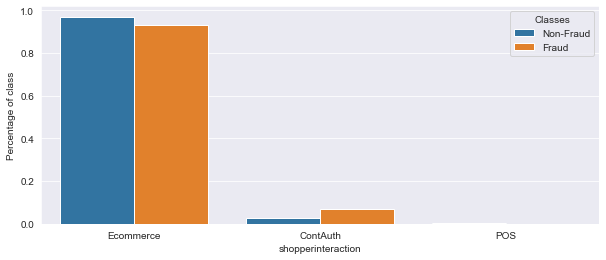

Figure 2: Card types


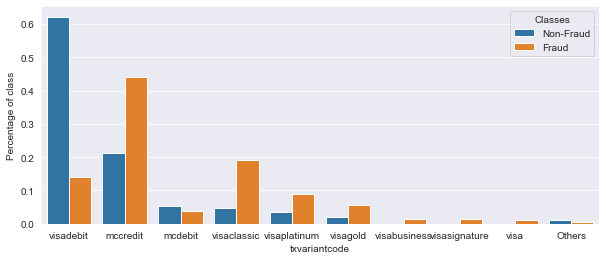

Figure 3,4,5: Countries and currencies


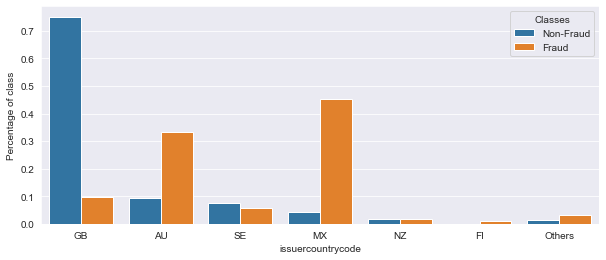

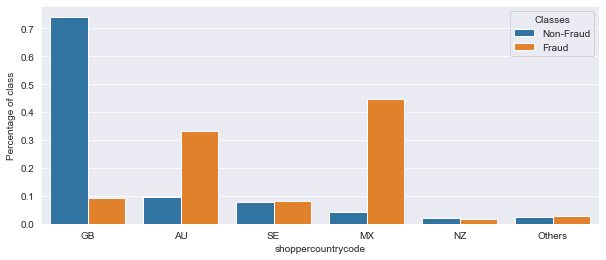

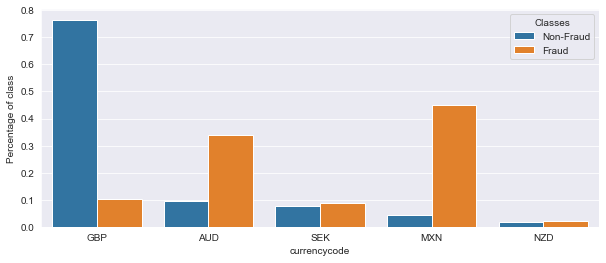

Figure 6,7: Heatmaps 'Currency code' vs 'Card type used' (all transactions vs fraud transactions)


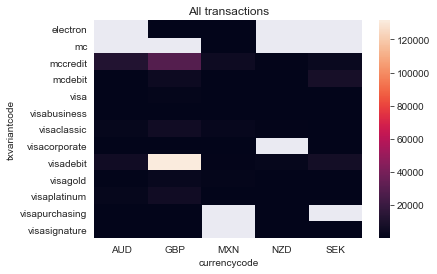

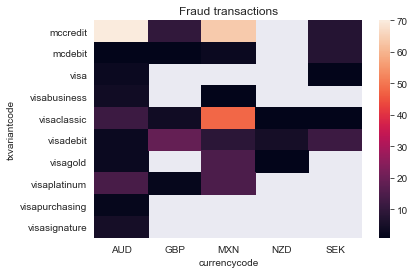

Figure 8: CVC Response Code


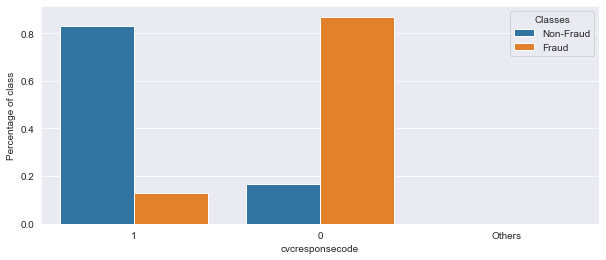

In [80]:
%load_ext autoreload
%autoreload 2

import visualisation as visual

# Obtain and process data
data = visual.load_data("data_for_student_case.csv")
pdata = vis.pre_process(data)
pdata_fraud = vis.get_fraud_data(pdata)
pdata_nonfraud = vis.get_nonfraud_data(pdata)

print("Figure 1: Shopper interaction")
visual.get_bar_plot(pdata, "shopperinteraction",0)

print("Figure 2: Card types")
visual.get_bar_plot(pdata, "txvariantcode",0.01)

print("Figure 3,4,5: Countries and currencies")
visual.get_bar_plot(pdata, "issuercountrycode",0.01)
visual.get_bar_plot(pdata, "shoppercountrycode",0.01)
visual.get_bar_plot(pdata, "currencycode",0)

print("Figure 6,7: Heatmaps 'Currency code' vs 'Card type used' (all transactions vs fraud transactions)")
visual.get_heatmap(pdata,pdata_fraud, "txvariantcode","currencycode")

print("Figure 8: CVC Response Code")
pdata_cvc = pdata.loc[pdata["cardverificationcodesupplied"] == True]
visual.get_bar_plot(pdata_cvc, "cvcresponsecode",0.01)

### 1b. Describe the visualizations and provide relavant explanations of features and relations.

At first we thought that the features containing ids would be valuable to use, but after reviewing the numbers we concluded that not a lot could be done with it rather than adding them to the blacklist. Reviewing the numbers for mail_id, ip_id, and card_id we can see that only the ip_id contains one ip that is used more than 5 times for the fraudulent cases. If there are multiple occurrences, they are all used in matter of days, always using the same currency and country as the first occurence, and sometimes switching the mail_id, ip_id and/or card_id. The majority of the fraudulent cases are those that occur once, and not been re-used.

If we look at other features we for instance find that both the Ecommerce and ContAuth are equally distributed for both classes, while POS is neglectible, see Figure 1. This indicates that if the method is a (monthly) subscription or a point of sale, it is not very likely to be fraudulent. 

The card types used clearly indicates that non-fraud transactions are mostly done by a visa debit card, while the mccredit card is used most for fraud cases, see Figure 2. We can therefore conclude that if a mccredit card is used, the probability of being fraud is higher than other cards.

Issuer country looks like to be linked to the shopper country and currency of the transaction since it follows the same pattern, see Figure 3, 4, and 5. This if of course quite obvious since a user often inquiries a card in the country he's living, using the country's currency. What interesting to see is that the non-fraudulent transactions are mostly done in Great Brittain (currency GBP). If we look at the fraud cases, most transactions are submitted from Mexico (with currency MXN) and Australia (with currency AUD). The other countries and currencies are not worth mentioning. 

In Figure 6 and 7 the relation between the currency used and card type used has been made by means of heatmaps. For the first heatmap all (pre-processed) data has been used, while the second heatmap only considers the fraudulent transactions. Again, the GBP (British pound) is the prominent currency used, which we also noticed in Figure 5. This heatmap additionally shows which card types are most used for each currency, which is in case of the GBP clearly is the visadebit card. The heatmap for all transactions furthermore does not include a lot of insights. If we look at the heatmap for only the fraud transactions we get a totally different view. We see that the mccredit card in combination with the AUD and MXN as currency are clearly most used, and that the MXN is also used often in combination with a visaclassic card. This means that these combinations of cards and currencies should be considered with a higher weight in fraud detection. It is also worth mentioning that the GBP in combination with a visadebit is used no more than average, meaning that GBP in combination with a visadebit card needs other measures to distinguish from a benign transaction.

We can also look at the difference between the CVC response codes in Figure 8. From all transactions in which a CVC code was supplied, almost all responses match the correct response in the non-fraudulent cases and a very small number for the fraud cases (these cards are probably hacked because the CVC is known). For the unknown response code we see the opposite: almost all fraudulent transactions have an unknown CVC response code, probably because the card is tested to be functioning without CVC code. The non-fraudulent transactions transcations contains a small amount of occurences, in which the actual user probably forgot to insert the CVC code.

## 2. Imbalance task – 1 A4 – Individual

### 2a. Print ROC curves

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

### 2c. Is using SMOTE a good idea? Why (not)?

## 3. Privacy task – 1 A4 – Individual

### 3a. Print ROC curves

### 3b. Analyse the performance of the classifiers. Explain which method performs best.

### 3c. Can you explain the performance difference for the different classifiers? Is it advisable to protect people’s privacy using rank-swapping? Why (not)?

## 4. Classification task – 2 A4

### 4a. Print relevant plots and metrics with clear headings.

### 4b. Explain the applied data pre-processing steps, learning algorithms, and post-processing steps or ensemble methods. Compare the performance of the two algorithms, focusing on performance criteria that are relevant in practice, use 10-fold cross-validation.

## 5. Bonus task – 1 A4

### 5a. Provide code and report below